In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
x = df.drop("price", axis=1)
y = df["price"]

In [6]:
x = pd.get_dummies(x, drop_first=True)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [9]:
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results
MAE: 970043.4039201637
RMSE: 1324506.9600914388
R2 Score: 0.6529242642153184


In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [11]:
print("Random Forest Results")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Results
MAE: 1021546.0353211008
RMSE: 1400565.9728553821
R2 Score: 0.611918531405699


In [12]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

In [13]:
results

,Model,R2 Score
0,Linear Regression,0.652924
1,Random Forest,0.611919


In [14]:
with open("house_price_model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [21]:
# Linear Regression metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

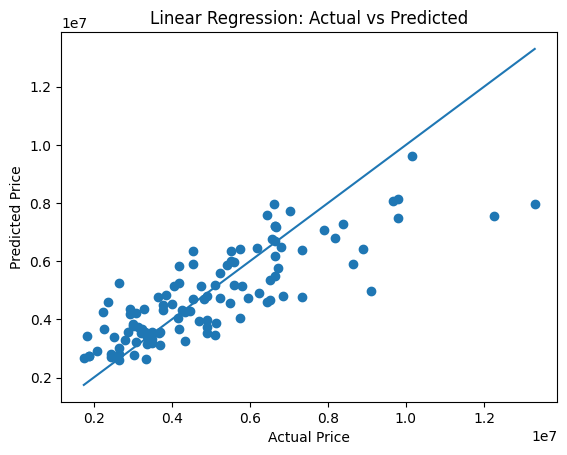

In [15]:
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

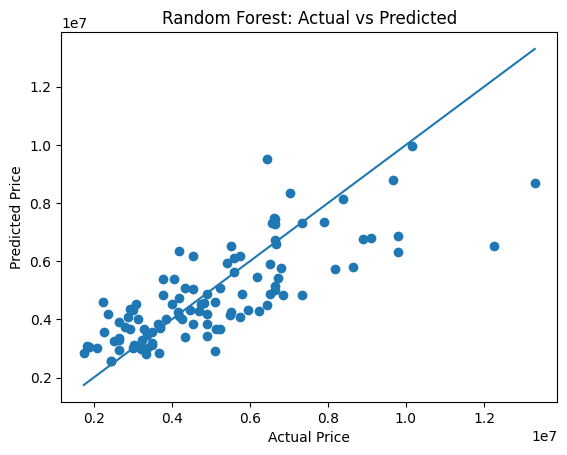

In [16]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

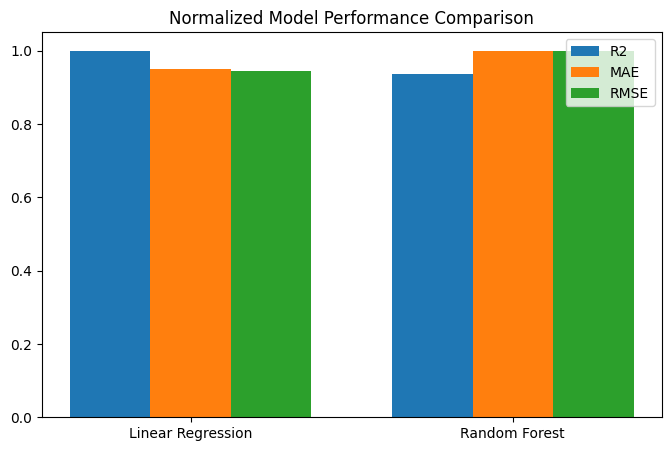

In [27]:
models = ["Linear Regression", "Random Forest"]

r2_values = [r2_lr, r2_rf]
mae_values = [mae_lr, mae_rf]
rmse_values = [rmse_lr, rmse_rf]

# Normalize everything
r2_norm = np.array(r2_values) / max(r2_values)
mae_norm = np.array(mae_values) / max(mae_values)
rmse_norm = np.array(rmse_values) / max(rmse_values)

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8,5))

plt.bar(x - width, r2_norm, width, label="R2")
plt.bar(x, mae_norm, width, label="MAE")
plt.bar(x + width, rmse_norm, width, label="RMSE")

plt.xticks(x, models)
plt.title("Normalized Model Performance Comparison")
plt.legend()
plt.show()
